# Problem Statement :
    The plants in Greenhouse are enclosed inside a building with glasses and
    have regulated climatic conditions. We to monitor whether the 
    greenhouse has suitable environmental conditions for the growth of plants 
    based on given parameters
     The task is to predict if these conditions are suitable for the growth of the 
    plants in the greenhouse from the readings that we obtain every from 
    the greenhouse

Importing all necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

In [2]:
#uploading training data set
train_data = pd.read_csv("D:\\IGT\data\\Siemenassignment\\train.csv")

In [3]:
train_data.head()

,date_time,temp,humidity,light,co2,humidity_ratio,suitable
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [4]:
train_data.describe()

,temp,humidity,light,co2,humidity_ratio,suitable
count,15080.000000,15080.000000,15080.000000,15080.000000,15080.000000,15080.000000
mean,20.948475,26.520671,139.891070,621.148233,0.004066,0.242241
std,1.145097,5.064903,219.841563,272.904169,0.000789,0.428454
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,22.790000,0.000000,447.000000,0.003508,0.000000
50%,20.730000,26.100000,0.000000,507.000000,0.003991,0.000000
75%,21.675000,30.125000,399.500000,664.250000,0.004615,0.000000
max,24.408333,39.500000,1697.250000,2028.500000,0.006476,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15080 entries, 0 to 15079
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       15080 non-null  object 
 1   temp            15080 non-null  float64
 2   humidity        15080 non-null  float64
 3   light           15080 non-null  float64
 4   co2             15080 non-null  float64
 5   humidity_ratio  15080 non-null  float64
 6   suitable        15080 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 824.8+ KB


In [6]:
# checking if there are any null or missing values
train_data.isnull().sum()

date_time         0
temp              0
humidity          0
light             0
co2               0
humidity_ratio    0
suitable          0
dtype: int64

In [7]:
#checking the output variable
train_data.suitable.unique()

array([1, 0], dtype=int64)

In [8]:
final_data = train_data.drop(['date_time'],axis = 1)

In [9]:
final_data.head()

,temp,humidity,light,co2,humidity_ratio,suitable
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [10]:
X = final_data.drop(['suitable'], axis = 1)

In [11]:
y = final_data.suitable

In [12]:
#splitting data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#creating a model
model = LogisticRegression()

In [14]:
#training model with the training data set
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#checking the accuracy of the trained model
model.score(X_test, y_test)

0.988949166164356

In [16]:
y_predicted = model.predict(X_test)

In [17]:
y_test

5404     1
3613     1
7634     0
9942     0
5221     1
        ..
1156     1
12461    0
32       1
12770    0
11696    0
Name: suitable, Length: 4977, dtype: int64

<AxesSubplot:>

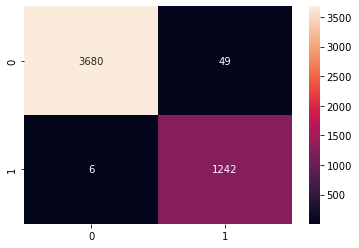

In [18]:
# Evaluating the prediction by using confusion matrix

comparison = confusion_matrix(y_test, y_predicted)
sns.heatmap(comparison, annot = True, fmt= 'd')


In [19]:
#calcuating F1 score
f1 = f1_score(y_test, y_predicted, average= 'weighted')
f1

0.9890107013265115

In [20]:
score = 100 * f1
score

98.90107013265114

In [21]:
#uploading the testing data for prediction
test_data = pd.read_csv("D:\\IGT\data\\Siemenassignment\\test.csv")

In [22]:
test_data.head()

,date_time,temp,humidity,light,co2,humidity_ratio
0,2015-02-14 13:59:59,20.390000,35.433333,31.000000,502.333333,0.005255
1,2015-02-14 14:00:59,20.365000,35.425000,31.000000,503.250000,0.005246
2,2015-02-14 14:02:00,20.390000,35.500000,31.000000,508.500000,0.005265
3,2015-02-14 14:03:00,20.323333,35.500000,31.000000,510.666667,0.005243
4,2015-02-14 14:04:00,20.290000,35.590000,28.666667,509.000000,0.005246


In [23]:
test_data.isnull().sum()

date_time         0
temp              0
humidity          0
light             0
co2               0
humidity_ratio    0
dtype: int64

In [24]:
final_test = test_data.drop(['date_time'], axis = 1)

In [25]:
predict = model.predict(final_test)

In [26]:
predict[20:25]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
pd.DataFrame(predict).to_csv("D:/IGT/data/Siemenassignment/submission.csv")
